In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3

In [5]:
# Create connection with database
con = sqlite3.connect('supermarket_sales.db')

In [18]:
# Find duplicate and missing values
task1 = 'SELECT * \
FROM supermarket_sales \
WHERE InvoiceID IS NULL \
    OR Branch IS NULL \
    OR City IS NULL \
    OR Customertype IS NULL \
    OR Gender IS NULL \
    OR Productline IS NULL \
    OR Unitprice IS NULL \
    OR Quantity IS NULL \
    OR `Tax5%` IS NULL \
    OR Total IS NULL \
    OR Date IS NULL \
    OR Time IS NULL \
    OR Payment IS NULL \
    OR Cogs IS NULL \
    OR grossmarginpercentage IS NULL \
    OR grossincome IS NULL \
    OR Rating IS NULL;'

result = pd.read_sql_query(task1, con)
print(result)


Empty DataFrame
Columns: [InvoiceID, Branch, City, Customertype, Gender, Productline, Unitprice, Quantity, Tax5%, Total, Date, Time, Payment, cogs, grossmarginpercentage, grossincome, Rating]
Index: []


In [20]:
# Find duplicate data
task2 = 'SELECT InvoiceID, Branch, City, Customertype, Gender, Productline, Unitprice, Quantity, `Tax5%`, Total, Date, Time, Payment, Cogs, grossmarginpercentage, grossincome, Rating, COUNT(*) AS total_duplikat \
FROM supermarket_sales \
GROUP BY InvoiceID, Branch, City, Customertype, Gender, Productline, Unitprice, Quantity, `Tax5%`, Total, Date, Time, Payment, Cogs, grossmarginpercentage, grossincome, Rating \
HAVING COUNT(*) > 1;'

result = pd.read_sql_query(task2, con)
print(result)

Empty DataFrame
Columns: [InvoiceID, Branch, City, Customertype, Gender, Productline, Unitprice, Quantity, Tax5%, Total, Date, Time, Payment, cogs, grossmarginpercentage, grossincome, Rating, total_duplikat]
Index: []


### Analyze Process

In this phase we conduct analysis by answering some questions

In [21]:
## Q1: Which branch has the best results in the loyalty program?
task3 = "SELECT Branch, SUM(Total) AS TotalSales \
FROM supermarket_sales \
WHERE Customertype = 'Member' \
GROUP BY Branch \
ORDER BY TotalSales DESC \
LIMIT 1;"

result = pd.read_sql_query(task3, con)
print(result)

  Branch  TotalSales
0      C  56881.2825


In [23]:
## Q2: Does the membership depend on customer rating?
task4 = 'SELECT Customertype, AVG(Rating) AS AvgRating \
FROM supermarket_sales \
GROUP BY Customertype;'

result = pd.read_sql_query(task4, con)
print(result)

  Customertype  AvgRating
0       Member   6.940319
1       Normal   7.005210


This type of customer tends to position them as non-member customers

  Customertype      Payment  TotalGrossIncome
0       Member         Cash         2602.9055
1       Member  Credit card         2751.0225
2       Member      Ewallet         2466.2360
3       Normal         Cash         2740.2645
4       Normal  Credit card         2047.4095
5       Normal      Ewallet         2771.5310


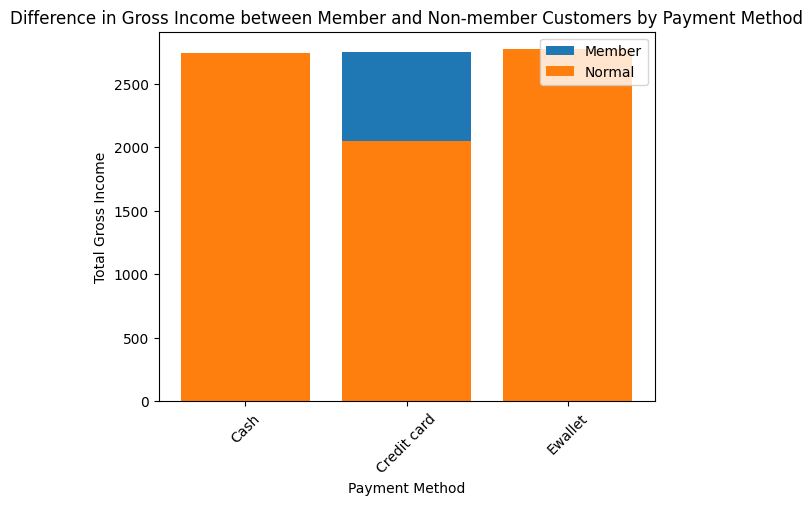

In [57]:
## Q3: Does gross revenue depend on the proportion of customers in the loyalty program?
## What is the relationship with the payment method?
task5 = 'SELECT Customertype, Payment, SUM(grossincome) AS TotalGrossIncome \
FROM supermarket_sales \
GROUP BY Customertype, Payment;'

result = pd.read_sql_query(task5, con)
print(result)

# Menampilkan visualisasi
customer_type = result['Customertype']
payment_method = result['Payment']
total_gross_income = result['TotalGrossIncome']

# Membuat plot diagram batang untuk pelanggan pria
plt.bar(payment_method[customer_type == 'Member'], total_gross_income[customer_type == 'Member'], label='Member')

# Membuat plot diagram batang untuk pelanggan wanita
plt.bar(payment_method[customer_type == 'Normal'], total_gross_income[customer_type == 'Normal'], label='Normal')

# Mengatur label sumbu x dan y
plt.xlabel('Payment Method')
plt.ylabel('Total Gross Income')
plt.xticks(rotation=45)
plt.title('Difference in Gross Income between Member and Non-member Customers by Payment Method')
plt.legend()
plt.show()

For the customer type, the highest revenue figure is 2751.0225 using the Credit Card payment method.
while for the non-member type the highest number was at 2771,531 with the Ewallet payment method

In [25]:
## Q4: Are there any differences in indicators between customers who are men and women?
task6 = 'SELECT Gender, AVG(Rating) AS AvgRating, AVG(Total) AS AvgTotal \
FROM supermarket_sales \
GROUP BY Gender;'

result = pd.read_sql_query(task6, con)
print(result)

   Gender  AvgRating    AvgTotal
0  Female   6.964471  335.095659
1    Male   6.980962  310.789226


In [26]:
## Q5: Which product category generates the highest income?
task7 = 'SELECT Productline, SUM(Total) AS TotalSales \
FROM supermarket_sales \
GROUP BY Productline \
ORDER BY TotalSales DESC \
LIMIT 1;'

result = pd.read_sql_query(task7, con)
print(result)

          Productline  TotalSales
0  Food and beverages   56144.844


Food and beverage products are the product line with the highest sales value

In [27]:
## Q6: Is there a difference in sales results between branches in different cities?
task8 = 'SELECT City, Branch, SUM(Total) AS TotalSales \
FROM supermarket_sales \
GROUP BY City, Branch;'

result = pd.read_sql_query(task8, con)
print(result)

        City Branch   TotalSales
0   Mandalay      B  106197.6720
1  Naypyitaw      C  110568.7065
2     Yangon      A  106200.3705


Branch C in the city of Naypyitaw is the branch with the highest total sales value

         Date  TotalSales
0    1/1/2019   4745.1810
1   1/10/2019   3560.9490
2   1/11/2019   2114.9625
3   1/12/2019   5184.7635
4   1/13/2019   2451.2040
..        ...         ...
84   3/5/2019   6230.8785
85   3/6/2019   3092.5965
86   3/7/2019   1438.2585
87   3/8/2019   3125.3880
88   3/9/2019   7474.0470

[89 rows x 2 columns]


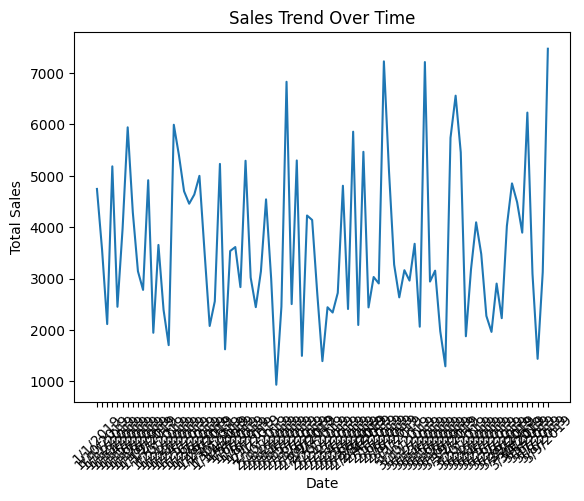

In [29]:
## Q7: What are the sales trends from time to time? Is there a seasonal pattern or trend of increase/decrease in income?
task9 = 'SELECT Date, SUM(Total) AS TotalSales \
FROM supermarket_sales \
GROUP BY Date \
ORDER BY Date;'

result = pd.read_sql_query(task9, con)
print(result)

# Visualize it into lineplot to see the trends
# Define variabel
dates = result['Date']
total_sales = result['TotalSales']

plt.plot(dates, total_sales)
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Sales Trend Over Time')
plt.xticks(rotation=45)
plt.show()

    Rating  AvgQuantity  TotalSales
0      4.0     5.000000   3986.5140
1      4.1     4.411765   3589.1835
2      4.2     6.818182   9275.9100
3      4.3     5.555556   5958.1095
4      4.4     5.705882   6716.5665
..     ...          ...         ...
56     9.6     5.823529   5592.2580
57     9.7     4.642857   3332.3955
58     9.8     4.368421   4976.9265
59     9.9     5.875000   5822.9325
60    10.0     7.600000   2080.3545

[61 rows x 3 columns]


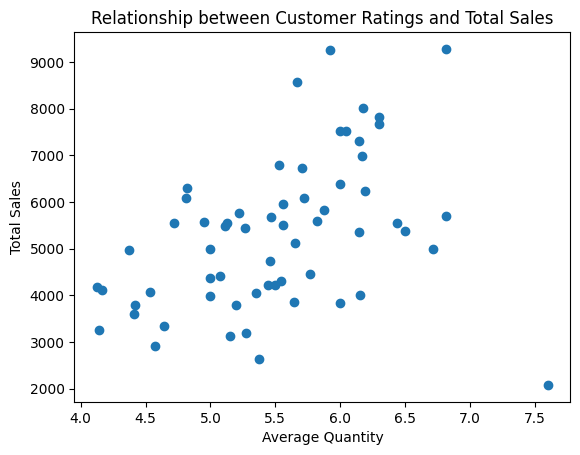

In [7]:
## Q8: Is there a relationship between customer ratings (Rating) and the number of products purchased or their total shopping?
task10 = 'SELECT Rating, AVG(Quantity) AS AvgQuantity, SUM(Total) AS TotalSales \
FROM supermarket_sales \
GROUP BY Rating;'

result = pd.read_sql_query(task10, con)
print(result)

# Membuat plot scatter
plt.scatter(result['AvgQuantity'], result['TotalSales'])
plt.xlabel('Average Quantity')
plt.ylabel('Total Sales')
plt.title('Relationship between Customer Ratings and Total Sales')

# Menampilkan plot
plt.show()

  Customertype      Payment  TotalTransactions
0       Member         Cash                168
1       Member  Credit card                172
2       Member      Ewallet                161
3       Normal         Cash                176
4       Normal  Credit card                139
5       Normal      Ewallet                184


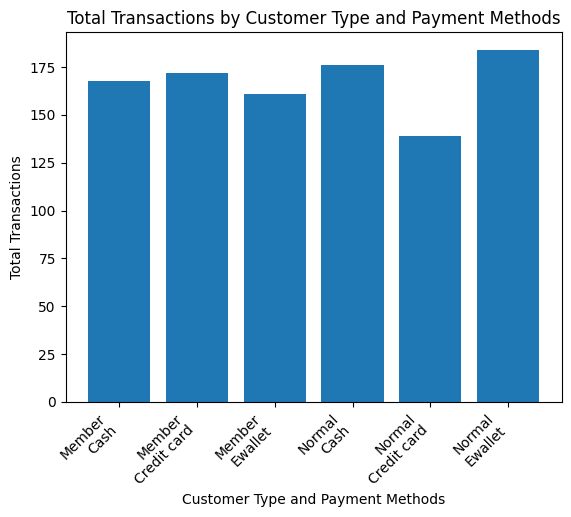

In [34]:
## Q9: How is the distribution of payment types among customers with membership and non-member customers?
task11 = 'SELECT Customertype, Payment, COUNT(*) AS TotalTransactions \
FROM supermarket_sales \
GROUP BY Customertype, Payment;'

result = pd.read_sql_query(task11, con)
print(result)

# Visualize it into barchart
# prepare variables
customertypes = result['Customertype']
payment = result['Payment']
total_transactions = result['TotalTransactions']

# Menentukan posisi x pada sumbu horizontal
x_pos = range(len(customertypes))

# Membuat plot diagram batang
plt.bar(x_pos, total_transactions)
plt.xlabel('Customer Type and Payment Methods')
plt.ylabel('Total Transactions')
plt.title('Total Transactions by Customer Type and Payment Methods')
plt.xticks(x_pos, [f'{cust_type}\n{payment}' for cust_type, payment in zip(customertypes, payment)])
plt.xticks(rotation=45, ha='right')
plt.show()

   Customertype             Productline  TotalTransactions
0        Member  Electronic accessories                 78
1        Member     Fashion accessories                 86
2        Member      Food and beverages                 94
3        Member       Health and beauty                 73
4        Member      Home and lifestyle                 83
5        Member       Sports and travel                 87
6        Normal  Electronic accessories                 92
7        Normal     Fashion accessories                 92
8        Normal      Food and beverages                 80
9        Normal       Health and beauty                 79
10       Normal      Home and lifestyle                 77
11       Normal       Sports and travel                 79


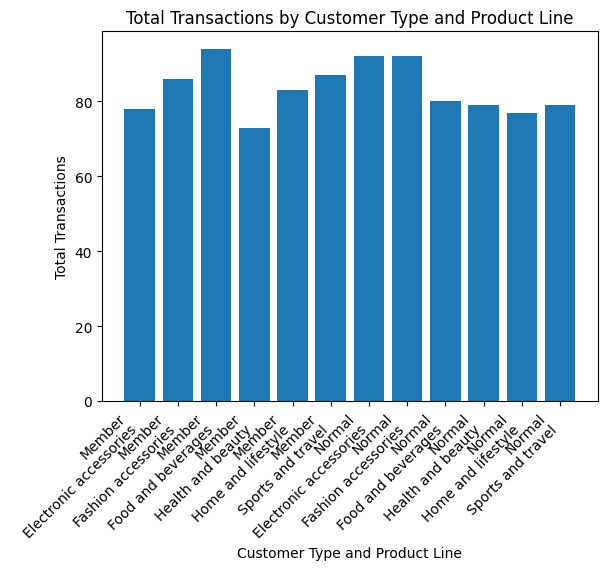

In [33]:
##Q10: Is there a difference in the types of products purchased by membership customers and non-member customers?
task12 = 'SELECT Customertype, Productline, COUNT(*) AS TotalTransactions \
FROM supermarket_sales \
GROUP BY Customertype, Productline;'

result = pd.read_sql_query(task12, con)
print(result)

# Visualize it into barchart
# prepare variables
customertypes = result['Customertype']
productlines = result['Productline']
total_transactions = result['TotalTransactions']

# Menentukan posisi x pada sumbu horizontal
x_pos = range(len(customertypes))

# Membuat plot diagram batang
plt.bar(x_pos, total_transactions)
plt.xlabel('Customer Type and Product Line')
plt.ylabel('Total Transactions')
plt.title('Total Transactions by Customer Type and Product Line')
plt.xticks(x_pos, [f'{cust_type}\n{prod_line}' for cust_type, prod_line in zip(customertypes, productlines)])
plt.xticks(rotation=45, ha='right')
plt.show()

     Unitprice  TotalSales
0        10.08     74.0880
1        10.13     74.4555
2        10.16     53.3400
3        10.17     10.6785
4        10.18     85.5120
..         ...         ...
938      99.82   1152.9210
939      99.83    628.9290
940      99.89    209.7690
941      99.92    629.4960
942      99.96   1679.3280

[943 rows x 2 columns]


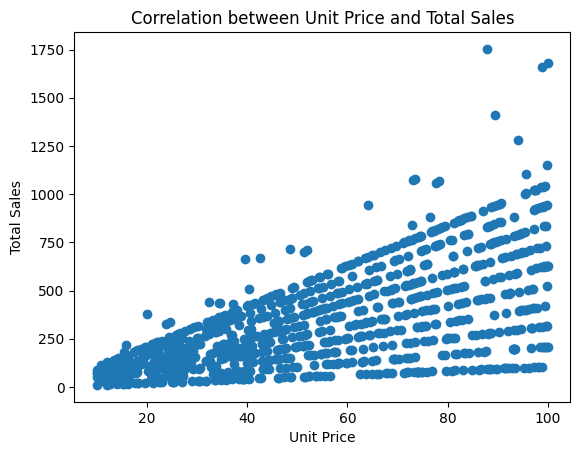

In [36]:
## Q11: Is there a correlation between the product unit price and the customer's total spending?
task13 = 'SELECT Unitprice, SUM(Total) AS TotalSales \
FROM supermarket_sales \
GROUP BY Unitprice;'

result = pd.read_sql_query(task13, con)
print(result)

# We're using scatter plot to see the correlation
# Menyiapkan data untuk visualisasi
unit_prices = result['Unitprice']
total_sales = result['TotalSales']

# Membuat plot scatter
plt.scatter(unit_prices, total_sales)
plt.xlabel('Unit Price')
plt.ylabel('Total Sales')
plt.title('Correlation between Unit Price and Total Sales')
plt.show()

       cogs  TotalGrossIncome
0     10.17            0.5085
1     12.09            0.6045
2     12.54            0.6270
3     12.78            0.6390
4     13.98            0.6990
..      ...               ...
985  973.80           48.6900
986  975.00           48.7500
987  985.20           49.2600
988  989.80           49.4900
989  993.00           49.6500

[990 rows x 2 columns]


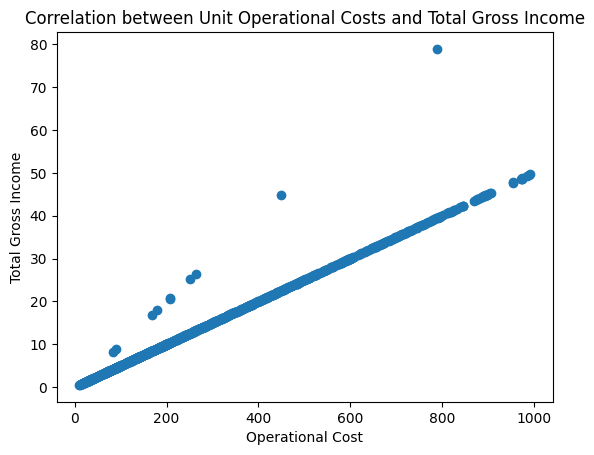

In [41]:
## Q12: What is the relationship between gross income and operational costs (COGS)?
task14 = 'SELECT Cogs, SUM(grossincome) AS TotalGrossIncome \
FROM supermarket_sales \
GROUP BY Cogs;'

result = pd.read_sql_query(task14, con)
print(result)

ope_cost = result['cogs']
totalgross_income = result['TotalGrossIncome']

# Membuat plot scatter
plt.scatter(ope_cost, totalgross_income)
plt.xlabel('Operational Cost')
plt.ylabel('Total Gross Income')
plt.title('Correlation between Unit Operational Costs and Total Gross Income')
plt.show()

There is a positive and linear correlation between operational costs and total gross income

         Date  TotalGrossIncome  TotalSales
0    1/1/2019          225.9610   4745.1810
1   1/10/2019          169.5690   3560.9490
2   1/11/2019          100.7125   2114.9625
3   1/12/2019          246.8935   5184.7635
4   1/13/2019          116.7240   2451.2040
..        ...               ...         ...
84   3/5/2019          296.7085   6230.8785
85   3/6/2019          147.2665   3092.5965
86   3/7/2019           68.4885   1438.2585
87   3/8/2019          148.8280   3125.3880
88   3/9/2019          355.9070   7474.0470

[89 rows x 3 columns]


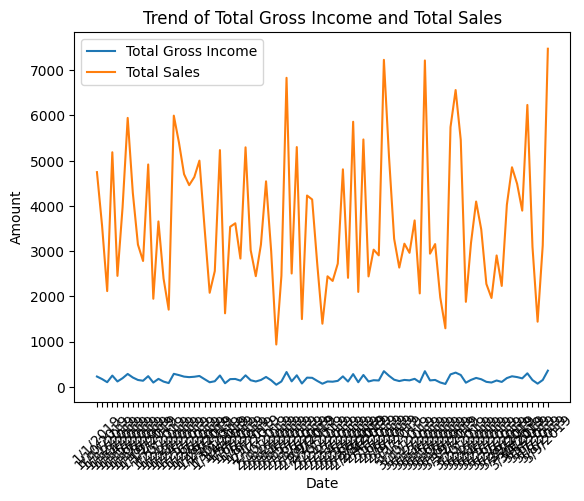

In [43]:
## Q13: Is there a trend of change in gross income or total spending over time?
task15 = 'SELECT Date, SUM(grossincome) AS TotalGrossIncome, SUM(Total) AS TotalSales \
FROM supermarket_sales \
GROUP BY Date \
ORDER BY Date;'

result = pd.read_sql_query(task15, con)
print(result)

# Menyiapkan data untuk visualisasi
dates = result['Date']
total_gross_income = result['TotalGrossIncome']
total_sales = result['TotalSales']

# Membuat plot diagram garis
plt.plot(dates, total_gross_income, label='Total Gross Income')
plt.plot(dates, total_sales, label='Total Sales')

# Mengatur label sumbu x dan y
plt.xlabel('Date')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.title('Trend of Total Gross Income and Total Sales')
plt.legend()
plt.show()

    Gender             Productline  TotalGrossIncome
0   Female  Electronic accessories         1290.5725
1   Female     Fashion accessories         1449.4000
2   Female      Food and beverages         1579.5675
3   Female       Health and beauty          883.8565
4   Female      Home and lifestyle         1430.3275
5   Female       Sports and travel         1360.7010
6     Male  Electronic accessories         1296.9290
7     Male     Fashion accessories         1136.5950
8     Male      Food and beverages         1093.9965
9     Male       Health and beauty         1458.7025
10    Male      Home and lifestyle         1134.5255
11    Male       Sports and travel         1264.1955


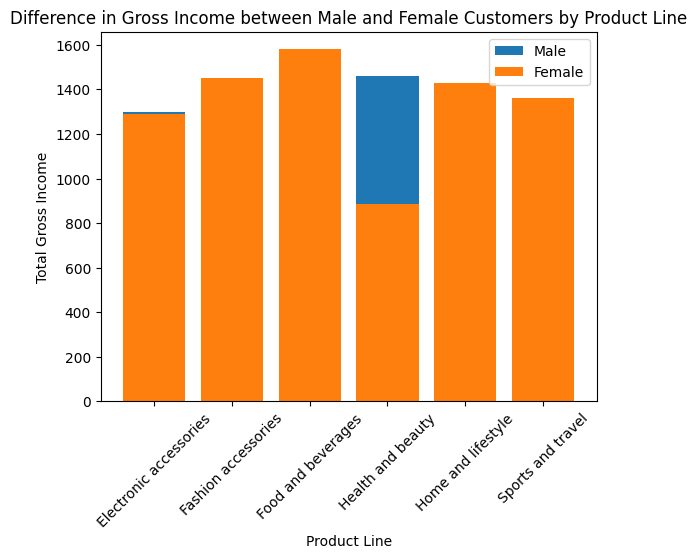

In [47]:
## Q14: Is there a difference in gross income between male and female customers in a given product category?
task16 = 'SELECT Gender, Productline, SUM(grossincome) AS TotalGrossIncome \
FROM supermarket_sales \
GROUP BY Gender, Productline;'

result = pd.read_sql_query(task16, con)
print(result)

# Menyiapkan data untuk visualisasi
gender = result['Gender']
productline = result['Productline']
total_gross_income = result['TotalGrossIncome']

# Membuat plot diagram batang untuk pelanggan pria
plt.bar(productline[gender == 'Male'], total_gross_income[gender == 'Male'], label='Male')

# Membuat plot diagram batang untuk pelanggan wanita
plt.bar(productline[gender == 'Female'], total_gross_income[gender == 'Female'], label='Female')

# Mengatur label sumbu x dan y
plt.xlabel('Product Line')
plt.ylabel('Total Gross Income')
plt.xticks(rotation=45)
plt.title('Difference in Gross Income between Male and Female Customers by Product Line')
plt.legend()
plt.show()

    Branch  Rating  TotalCustomers
0        A     4.0               2
1        A     4.1               5
2        A     4.2              11
3        A     4.3               6
4        A     4.4               6
..     ...     ...             ...
178      C     9.6               5
179      C     9.7               5
180      C     9.8               6
181      C     9.9               4
182      C    10.0               1

[183 rows x 3 columns]


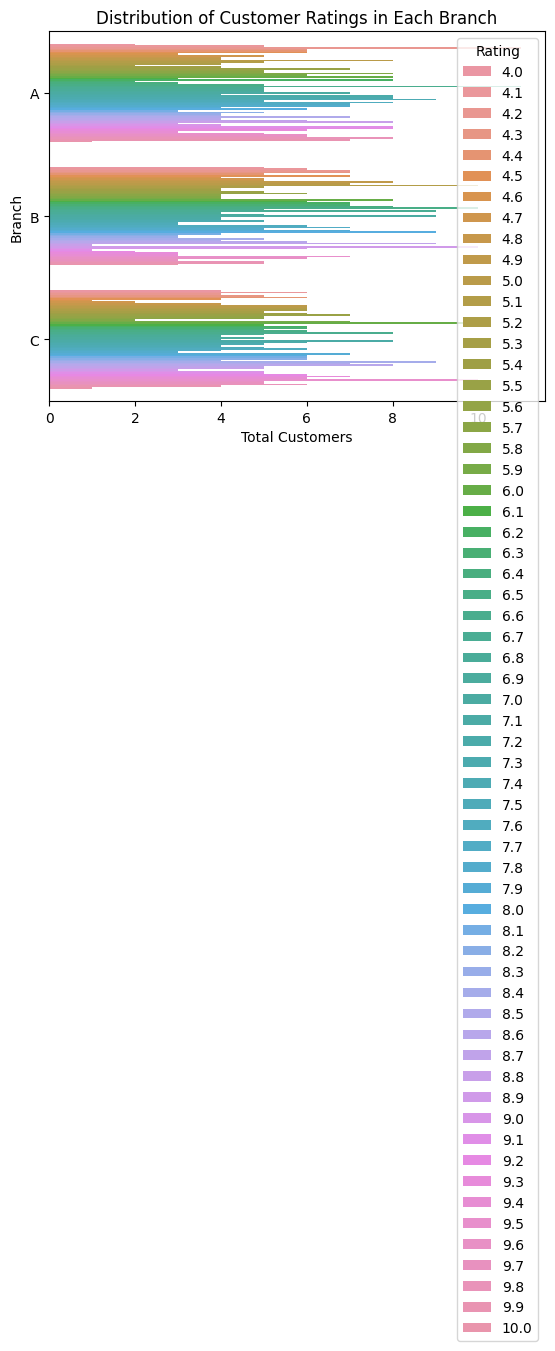

In [55]:
## Q15: How is the distribution of customer ratings in each branch?
task17 = 'SELECT Branch, Rating, COUNT(*) AS TotalCustomers \
FROM supermarket_sales \
GROUP BY Branch, Rating;'

result = pd.read_sql_query(task17, con)
print(result)

sns.barplot(data=result, y='Branch', x='TotalCustomers', hue='Rating', orient='h')
plt.xlabel('Total Customers')
plt.ylabel('Branch')
plt.title('Distribution of Customer Ratings in Each Branch')

# Menampilkan plot
plt.show()

In [58]:
# Terminate Connection
con.close()

### Conclusion

After all the process done, we take some key points to be conclude:
1. Branch C has the highest total sales
2. This type of customer tends to position them as non-members
3. Members prefer to make transactions using credit cards, while non-members more often use E-wallets, this can be used as a reference for carrying out a marketing strategy to attract more customers from these 2 types of customers along with the preferred payment method, by carrying out promotions.
4. For customers based on gender, we feel balanced.
5. Food and Beverages is the produce that has the highest total sales.
6. Branch C in the city of Naypyitaw is the branch that has the highest sales.
7. Sales trends have fluctuated, especially the period from January to March.
8. For the average quantity with total sales also shows a positive relationship.
9. The two types of customers both show that the food and beverage product line is the favorite and has the highest sales, which can also be used as a reference for conducting promotions related to this product line.
10. A positive relationship is also shown between the unit price and total sales and a positive linear graph is shown from operational costs to total gross income.
11. The downward nail trend is also shown from total gross income to total sales.
12. Gross income by gender in relation to product lines provided indicates that both men and women spend money on food and drink.